In [1]:
from langchain_community.llms import Ollama
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

from langchain_groq import ChatGroq
from langchain.chains import RetrievalQA

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
llm_obj = ChatGroq(model="groq/compound-mini",api_key=os.getenv("GROQ_API_KEY"))

In [8]:
import os
os.getcwd()

'C:\\Users\\karth'

In [9]:
os.chdir("C://Users//karth//llmapps//")
os.getcwd()

'C:\\Users\\karth\\llmapps'

In [10]:
! streamlit run p1.py

^C


In [ ]:
From commandline / terminal 
C:\Users\karth\llmapps>python -m streamlit run p1.py


In [ ]:
Randomforest
|
student --- teacher => computer       ----
        --- friend1  => Physics 
        --- friend2  => Maths
        --- uncle  ==> computer       ----   //computer
        --- teacher ==> Civil



In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [18]:
# load data 
iris = load_iris()

sepal_length = [4.0,8.0,6.0] 
sepal_width =  [2.0,4.5,3.2]
petal_length = [1.0,7.0,4.0]
petal_width = [0.1,2.3,1.2]
# model - ML algm
obj = RandomForestClassifier()
obj.fit(iris.data,iris.target)

# prediction
# obj.predict([[sepal_length,sepal_width,petal_length,petal_width]])
#iris.target_names[pred][0]

RandomForestClassifier()

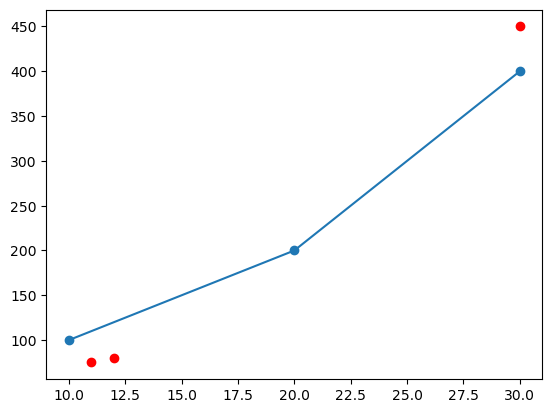

In [25]:
import matplotlib.pyplot as plt
plt.scatter([11,12,30],[75,80,450],color='r')
plt.plot([10,20,30],[100,200,400],marker='o')

In [27]:
os.getcwd()

'C:\\Users\\karth\\llmapps'

In [28]:
os.listdir('.')

['p1.py',
 'p2.py',
 'p3.py',
 'p4.py',
 'p5.py',
 'p6.py',
 'p7.py',
 'p7_randomforest.py',
 'PDF_RAG_app.py']

In [29]:
! streamlit run PDF_RAG_app.py

^C


In [ ]:
In Lang chain
|->Loading ->chunks ->embedding ->vectorstore ->...
    
LangGraph
=========
|->LangGraph  - library/framework
  |->application steps many + more tools + more data...//langgraph
 |->multistep stateful 

Graph(G)=(V,E)

person1 <------edge------> person2
(node1)                (node2)
  |
 edge
  |
(person3)

llm = model 
tool (ex: calc )
agent = model + tool 
=====    ---     ===

1. node
2. edge
3. state/memory 
4. human in loop 

[Person] --- City1 -->City2
  |-->AI Assist 
             |->book the ticket - bookagent  
        <-------->

[user prompt]
 |
planner agent <----> llm
 |
executer agent
 |
[output]

In [30]:
pip install langgraph

In [35]:
import langgraph

In [44]:
from langgraph.graph import StateGraph,END

class state(dict):
    messages: list

StateGraph(state).add_node

<bound method StateGraph.add_node of <langgraph.graph.state.StateGraph object at 0x000002BBFEE01590>>

In [ ]:
typing module => native types
  Query - string
  response - list
typedict
---
__init__
__del__
__call__
__str__

In [45]:
s='hello'
len(s)

5

In [47]:
class box:
    def __init__(self):
        self.var = 10
obj = box()
# len(obj) TypeError: object of type 'box' has no len()

In [48]:
class box:
    def __len__(self):
        return 10
obj = box()
len(obj)

10

In [52]:
llm_obj = ChatGroq(model="groq/compound-mini",api_key=os.getenv("GROQ_API_KEY"))

In [83]:
from typing import List,TypedDict,Optional

In [91]:
class AgentState(TypedDict):
    user_input: str
    task_list: List[str]
    final_output: Optional[str]

In [92]:
def planner_node(state: dict) ->dict:
    #prompt= f"Give step by step task results:{state:['user_input']}"
    prompt = f"Give step by step task results: {state.get('user_input')}"
    response = llm_obj.invoke(prompt)
    r = response.content
    step_lines = [var.strip("-").strip() for var in r.split("\n") if var.strip()]
    #print("Planner output:",step_lines)
    return {"task_list": step_lines}

In [102]:
def executor_node(state: dict) ->dict:
    steps = state.get("task_list",[])
    final_docs = " --> ".join(steps) + " --> Thank you!"
    return {'final_output':final_docs}

In [103]:
from langgraph.graph import StateGraph

gobj = StateGraph(state_schema=AgentState)


In [104]:
gobj.add_node('planner',planner_node)
gobj.add_node('executor',executor_node)

gobj.set_entry_point('planner')
gobj.add_edge("planner","executor")
gobj.set_finish_point("executor")

In [105]:
graph_compiled = gobj.compile()

In [106]:
state = {"user_input": "what is langgraph?"}
final_state = graph_compiled.invoke(state)

In [107]:
print(final_state.keys())

dict_keys(['user_input', 'task_list', 'final_output'])


In [109]:
# print(final_state['final_output'])
import pprint
pprint.pprint(final_state['final_output'])

('**LangGraph – Step‑by‑Step Overview** --> Below is a concise, numbered '
 'walk‑through that explains *what* LangGraph is, how it is built, and why it '
 'matters. -->  --> ### 1. What\u202fis\u202fLangGraph? --> **A graph‑based '
 'orchestration framework** for building, managing, and deploying **stateful, '
 'long‑running AI agents**. --> It sits on top of **LangChain** (or can be '
 'used independently) and adds **cyclic graph capabilities** that go beyond '
 'the linear “chain” model of LangChain. --> ### 2. Core Design Principle --> '
 '**Workflows = Graphs** --> - **Nodes** = individual computational steps (LLM '
 'calls, tool invocations, Python functions, etc.). --> - **Edges** = the '
 'routing logic that decides which node runs next, based on the current state '
 'or output. --> This graph model enables **loops, branching, and conditional '
 'paths**—the building blocks of autonomous, multi‑agent systems. --> ### 3. '
 'Key Components --> | Component | Role | --> |---------

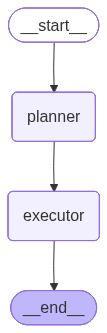

In [113]:
from IPython.display import Image,display
try:
    display(Image(graph_compiled.get_graph().draw_mermaid_png()))
except Exception:
    pass
